# Esercizio 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

Questo esercizio serve per capire il funzionamento di una rete neurale e il ruolo dei vari parametri del modello. L'obiettivo è fittare delle misure generate secondo una legge lineare con rumore gaussiano a media nulla e varianza $\sigma^2$.

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Utilizzo 5000 dati spartiti al 95% per il training e il 5% per la validazione.

In [2]:
import numpy as np

Ntot = 5000

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, int(Ntot*0.95))
x_valid = np.random.uniform(-1, 1, int(Ntot*0.05))
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

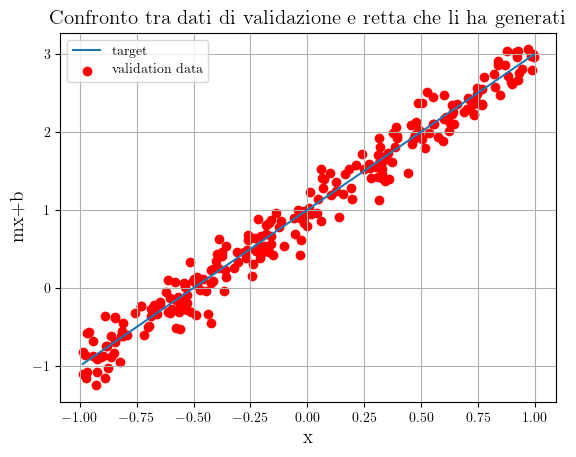

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.xlabel("x", fontsize = 14)
plt.ylabel("mx+b", fontsize = 14)
plt.title("Confronto tra dati di validazione e retta che li ha generati", fontsize = 15, fontweight = "bold")
plt.show()

In questo caso la rete scelta è formata da un solo neurone, che, con il suo peso e il suo bias, può interpolare una retta.

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2024-06-16 14:42:58.922930: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-16 14:42:58.925194: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-16 14:42:58.963227: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 14:42:58.963278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 14:42:58.965192: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


L'allenamento della rete neurale avviene divendendo i 5000 dati in blocchi da 160, con cui viene calcolato il gradiente imperfetto che garantisce la stocasticità del processo.

In [6]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=160, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/40
30/30 [==============================] - 0s 6ms/step - loss: 2.6595 - mse: 2.6595 - val_loss: 1.8546 - val_mse: 1.8546
Epoch 2/40
30/30 [==============================] - 0s 2ms/step - loss: 1.5789 - mse: 1.5789 - val_loss: 1.1617 - val_mse: 1.1617
Epoch 3/40
30/30 [==============================] - 0s 2ms/step - loss: 1.0052 - mse: 1.0052 - val_loss: 0.7634 - val_mse: 0.7634
Epoch 4/40
30/30 [==============================] - 0s 5ms/step - loss: 0.6662 - mse: 0.6662 - val_loss: 0.5157 - val_mse: 0.5157
Epoch 5/40
30/30 [==============================] - 0s 2ms/step - loss: 0.4530 - mse: 0.4530 - val_loss: 0.3544 - val_mse: 0.3544
Epoch 6/40
30/30 [==============================] - 0s 2ms/step - loss: 0.3141 - mse: 0.3141 - val_loss: 0.2480 - val_mse: 0.2480
Epoch 7/40
30/30 [==============================] - 0s 2ms/step - loss: 0.2225 - mse: 0.2225 - val_loss: 0.1771 - val_mse: 0.1771
Epoch 8/40
30/30 [==============================] - 0s 2ms/step - loss: 0.1615 - mse: 0.16

In questo caso i due parametri della NN sono esattamenti i coefficienti della retta m e b.

In [7]:
# return weights and biases
model.get_weights()

[array([[1.9986287]], dtype=float32), array([0.998262], dtype=float32)]

In [8]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/8 [==>...........................] - ETA: 0s - loss: 2.7789e-07 - mse: 2.7789e-07

8/8 [==============================] - 0s 2ms/step - loss: 3.4696e-06 - mse: 3.4696e-06

Test loss: 3.46960359820514e-06
Test accuracy: 3.46960359820514e-06


Come si vede nel grafico sotto, la funzione di loss (qui un mean squared error), è sempre maggiore per i dati di training rispetto a quelli di validazione: dunque non siamo in overfitting.

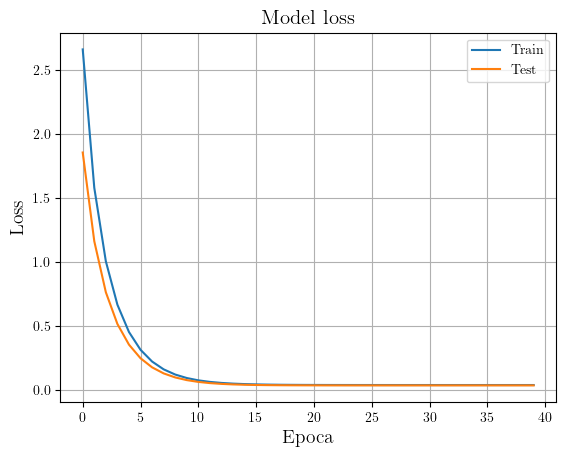

In [9]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize = 15, fontweight = "bold")
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Epoca', fontsize = 14)
plt.grid()
plt.legend(['Train', 'Test'], loc='best')
plt.show()

2/2 [==============================] - 0s 9ms/step


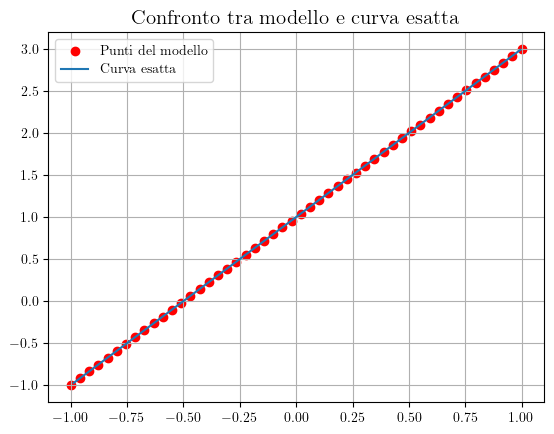

In [10]:
x_predicted = np.linspace(-1, 1, 50)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.title("Confronto tra modello e curva esatta", fontsize = 15, fontweight = "bold")
plt.legend(['Punti del modello', 'Curva esatta'], loc='best')
plt.show()

Giocando con i parametri ci si accorge che:
- aumentando il numero di epoche $N_{\mathrm{epochs}}$, i valori di m e b migliorano; tuttavia, una volta che il sistema è nel minimo, la loss tende ad appiattarsi e non migliorare più;
- aumentando il numero dai dati con cui allenare la rete $N_{\mathrm{train}}$, il risultato migliora leggermente;
- se generiamo dati con una varianza più grande si vede dal test loss che l'accordo tra i dati esatti e quelli predetti dal modello peggiora di poco.